# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

posns = np.load("./data/dithPos.dat",allow_pickle=True)

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


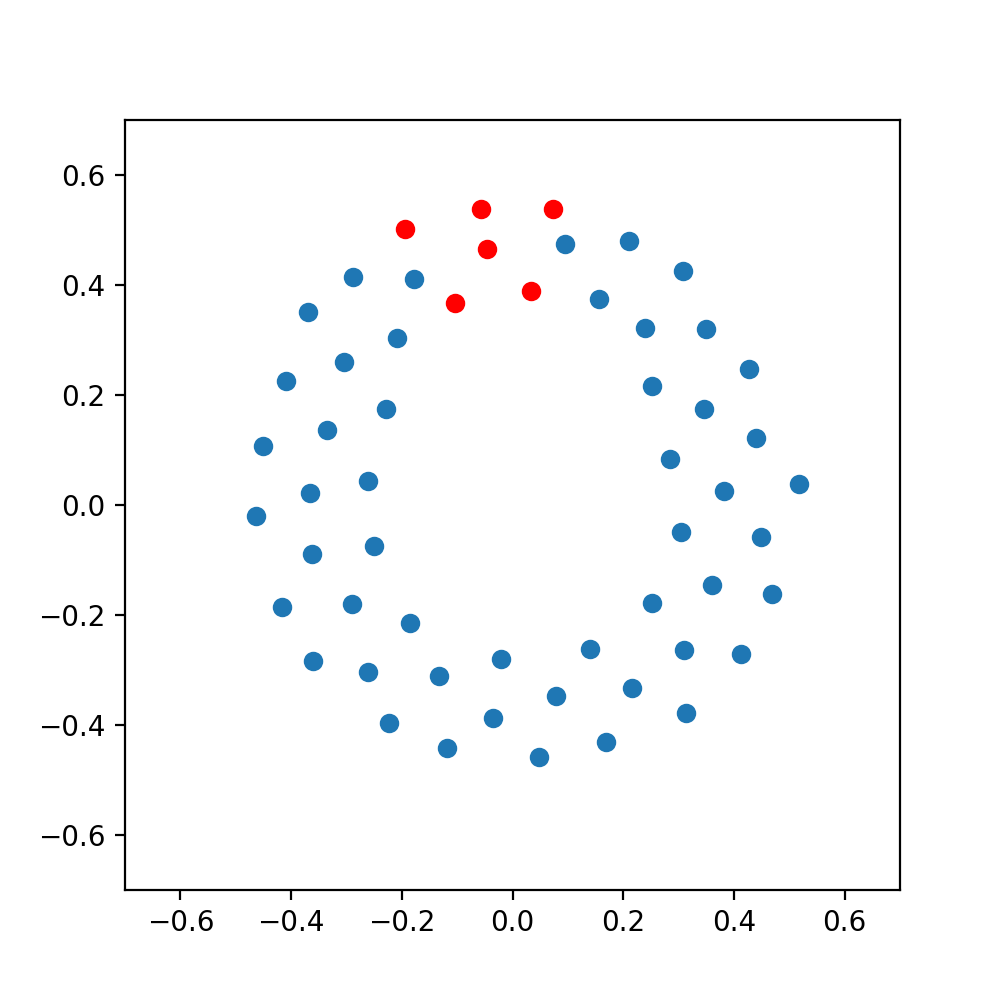

15

In [5]:
idx = 79

shape = posns[idx]
extra_points = np.empty((0, 2))

# Create subplots
fix, ax = plt.subplots(1, 1, figsize=(5,5))

a = ax.scatter(shape[:,0],shape[:,1])
b = ax.scatter(extra_points[:,0],extra_points[:,1], color='r')


ax.set_xlim(-.7, .7)
ax.set_ylim(-.7, .7)

def add_remove_points(event):
    global b, extra_points
    xydata = b.get_offsets()
    xdata = xydata[:,0]
    ydata = xydata[:,1]

    newx = event.xdata
    newy = event.ydata

    if event.button == 1:
        xydata = np.vstack((xydata, [newx, newy]))
        b.set_offsets(xydata)
        plt.draw()


fix.canvas.mpl_connect('button_press_event', add_remove_points)

<IPython.core.display.Javascript object>


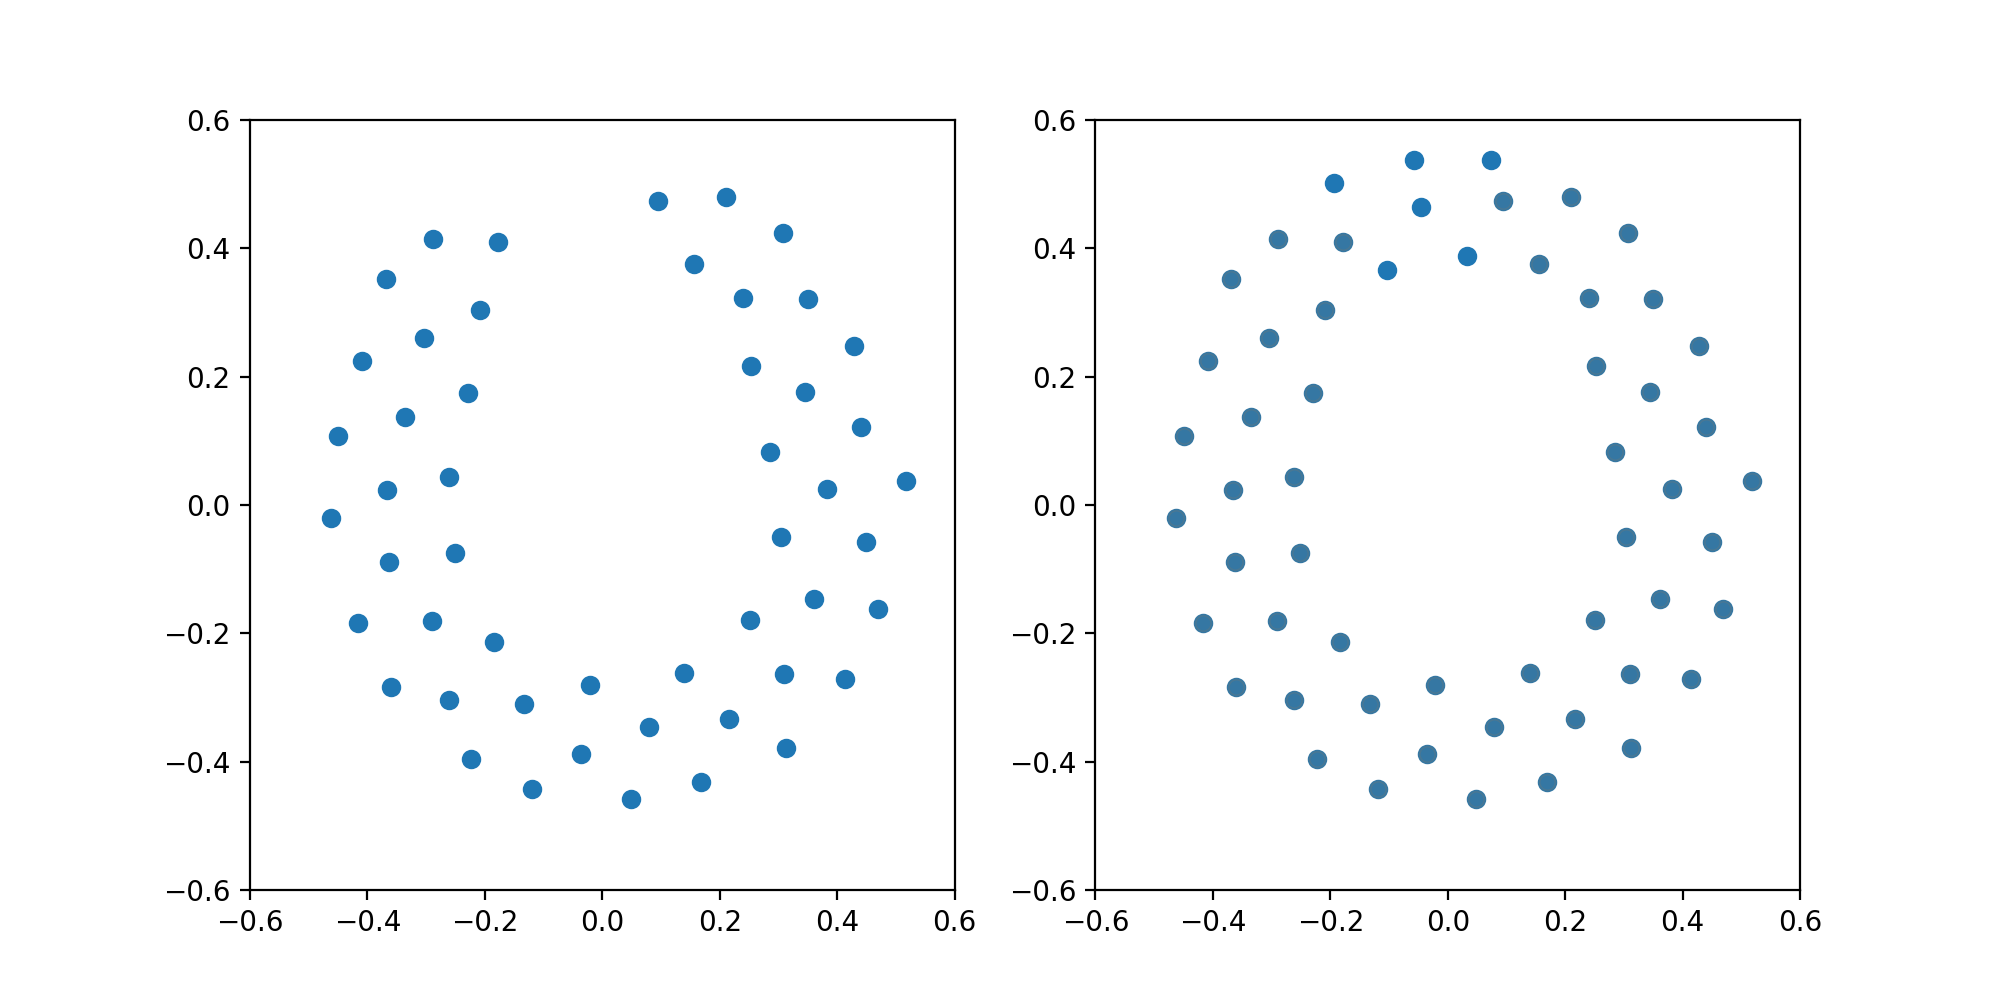

In [6]:
shape = posns[idx]
subset_data = np.vstack((shape, b.get_offsets().data))

np.save(f"subset_data/shape_{idx}.npy", shape)
np.save(f"subset_data/subset_{idx}.npy", subset_data)

fix, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(shape[:,0], shape[:,1])
ax[0].set_xlim(-.6, .6)
ax[0].set_ylim(-.6, .6)

ax[1].scatter(subset_data[:,0],subset_data[:,1])
ax[1].scatter(shape[:,0],shape[:,1], alpha=0.1)
ax[1].set_xlim(-.6, .6)
ax[1].set_ylim(-.6, .6)

plt.show()

<IPython.core.display.Javascript object>


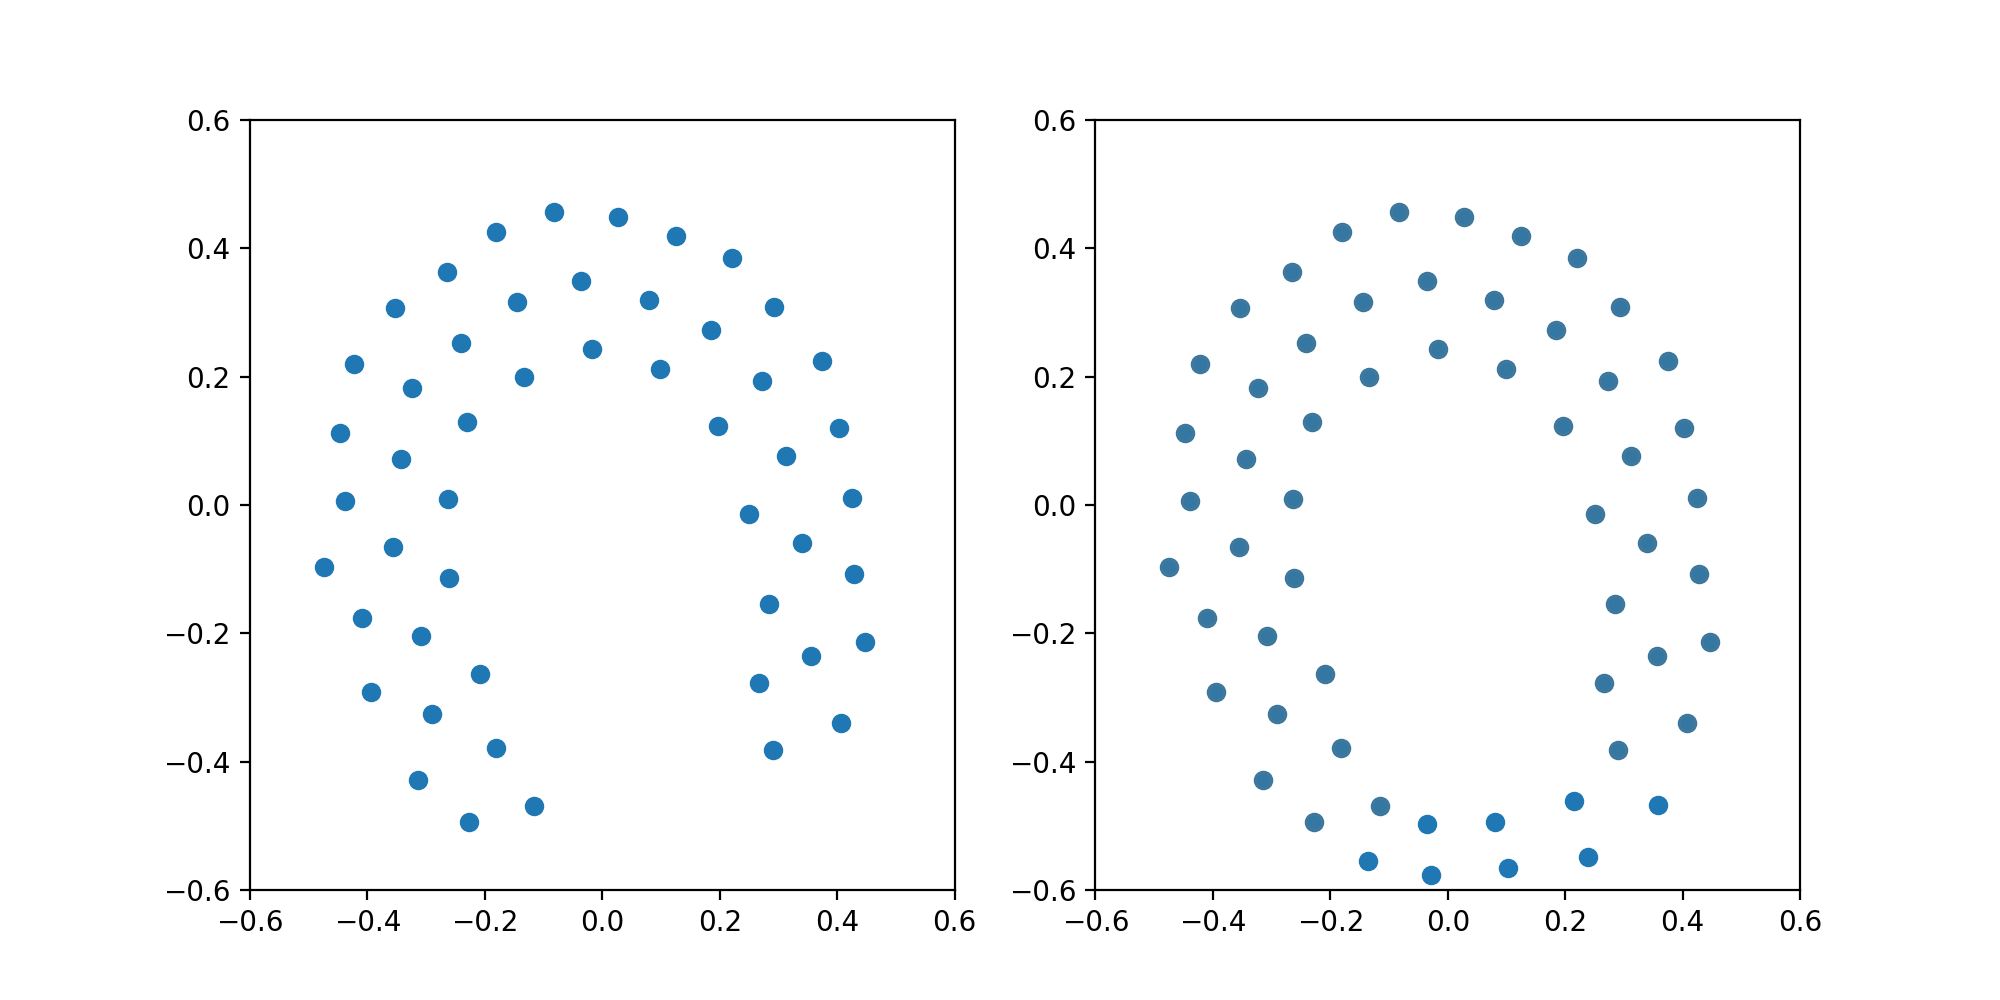

In [3]:
idx = 76

shape = np.load(f"subset_data/shape_{idx}.npy")
subset_data = np.load(f"subset_data/subset_{idx}.npy")

fix, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(shape[:,0], shape[:,1])
ax[0].set_xlim(-.6, .6)
ax[0].set_ylim(-.6, .6)

ax[1].scatter(subset_data[:,0],subset_data[:,1])
ax[1].scatter(shape[:,0],shape[:,1], alpha=0.1)
ax[1].set_xlim(-.6, .6)
ax[1].set_ylim(-.6, .6)

plt.show()

In [17]:
idx = 5

if not 0 <= idx < 20:
    raise ValueError("Index out of bounds")

save = False
shape = posns[idx]

xmin, xmax = -.2, .22
ymin, ymax = -.15, .33

subset = np.all([shape[:,0] >= xmin, shape[:,0] <= xmax, shape[:,1] >= ymin, shape[:,1] <= ymax], axis=0)
subset_data = shape[subset]

# Save shape and subset to file
if save:
    np.save(f"subset_data/shape_{idx}.npy", shape)
    np.save(f"subset_data/subset_{idx}.npy", subset_data)
else:
    print("NOT SAVING")

# Create subplots
fix, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(shape[:,0],shape[:,1])

# Plot dashed lines at vertical lines at xmin and xmax
ax[0].axvline(x=xmin, color='k', linestyle='--')
ax[0].axvline(x=xmax, color='k', linestyle='--')

# Plot dashed lines at horizontal lines at ymin and ymax
ax[0].axhline(y=ymin, color='k', linestyle='--')
ax[0].axhline(y=ymax, color='k', linestyle='--')

ax[0].set_xlim(-.5, .5)
ax[0].set_ylim(-.5, .5)

ax[1].scatter(shape[:,0],shape[:,1], alpha=0.1)
ax[1].scatter(subset_data[:,0],subset_data[:,1])
ax[1].set_xlim(-.5, .5)
ax[1].set_ylim(-.5, .5)

plt.show()

In [7]:
idx = 39

if not 20 <= idx < 40:
    raise ValueError("Index out of range")

save = True
shape = posns[idx]

centerx, centery = -.4, .37
radius = 0.45

# Get all data within the circle
subset = np.sqrt((shape[:,0] - centerx)**2 + (shape[:,1] - centery)**2) <= radius
subset_data = shape[subset]

# Save shape and subset to file
if save:
    np.save(f"subset_data/shape_{idx}.npy", shape)
    np.save(f"subset_data/subset_{idx}.npy", subset_data)
else:
    print("NOT SAVING")

# Create subplots
fix, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(shape[:,0],shape[:,1])

# Plot dashed circle
circle = plt.Circle((centerx, centery), radius, color='k', fill=False)
ax[0].add_artist(circle)
ax[0].scatter(centerx, centery, color='k', s=100)

ax[0].set_xlim(-.6, .6)
ax[0].set_ylim(-.6, .6)

ax[1].scatter(shape[:,0],shape[:,1], alpha=0.1)
ax[1].scatter(subset_data[:,0],subset_data[:,1])
ax[1].set_xlim(-.6, .6)
ax[1].set_ylim(-.6, .6)

plt.show()

In [6]:
idx = 59

if not 40 <= idx < 60:
    raise ValueError("Index out of range")

save = False
shape = posns[idx]

centerx, centery = 0, 0
radius = 0.32

# Get all data within the circle
subset = np.sqrt((shape[:,0] - centerx)**2 + (shape[:,1] - centery)**2) <= radius
subset_data = shape[subset]

# Save shape and subset to file
if save:
    np.save(f"subset_data/shape_{idx}.npy", shape)
    np.save(f"subset_data/subset_{idx}.npy", subset_data)
else:
    print("NOT SAVING")

# Create subplots
fix, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(shape[:,0],shape[:,1])

# Plot dashed circle
circle = plt.Circle((centerx, centery), radius, color='k', fill=False)
ax[0].add_artist(circle)
ax[0].scatter(centerx, centery, color='k', s=100)

ax[0].set_xlim(-.6, .6)
ax[0].set_ylim(-.6, .6)

ax[1].scatter(shape[:,0],shape[:,1], alpha=0.1)
ax[1].scatter(subset_data[:,0],subset_data[:,1])
ax[1].set_xlim(-.6, .6)
ax[1].set_ylim(-.6, .6)

plt.show()

In [7]:
all_files = sorted(glob("subset_data/*.npy"), key = lambda x: int(x.split("_")[-1].split(".")[0]) + 100 * int(x.split("/")[1].split("_")[0] == 'subset'))
print(len(all_files))

# Load all files
data = {file.split('/')[-1]: np.load(file) for file in all_files}
all_files

160


['subset_data/shape_0.npy',
 'subset_data/shape_1.npy',
 'subset_data/shape_2.npy',
 'subset_data/shape_3.npy',
 'subset_data/shape_4.npy',
 'subset_data/shape_5.npy',
 'subset_data/shape_6.npy',
 'subset_data/shape_7.npy',
 'subset_data/shape_8.npy',
 'subset_data/shape_9.npy',
 'subset_data/shape_10.npy',
 'subset_data/shape_11.npy',
 'subset_data/shape_12.npy',
 'subset_data/shape_13.npy',
 'subset_data/shape_14.npy',
 'subset_data/shape_15.npy',
 'subset_data/shape_16.npy',
 'subset_data/shape_17.npy',
 'subset_data/shape_18.npy',
 'subset_data/shape_19.npy',
 'subset_data/shape_20.npy',
 'subset_data/shape_21.npy',
 'subset_data/shape_22.npy',
 'subset_data/shape_23.npy',
 'subset_data/shape_24.npy',
 'subset_data/shape_25.npy',
 'subset_data/shape_26.npy',
 'subset_data/shape_27.npy',
 'subset_data/shape_28.npy',
 'subset_data/shape_29.npy',
 'subset_data/shape_30.npy',
 'subset_data/shape_31.npy',
 'subset_data/shape_32.npy',
 'subset_data/shape_33.npy',
 'subset_data/shape_34.n

In [8]:
# Dump all data to file not using numpy
np.savez("bone_star_data.npz", **data)

In [9]:
# Load all data
data = np.load("bone_star_data.npz")
data

NpzFile 'bone_star_data.npz' with keys: shape_0.npy, shape_1.npy, shape_2.npy, shape_3.npy, shape_4.npy...